# ELECTRICITY DEMAND ESTIMATION 

In [1]:
## Loading the Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Loading data
data=pd.read_csv("/Users/reetarora/Downloads/Analytics labs case studies/Capstone project 3 demand forecasting/Electricity Consumption.csv")

In [3]:
data.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [5]:
## Converting Date into Datetime format
data["DATE"]=pd.to_datetime(data["DATE"],format="%m/%d/%Y")

In [6]:
## Renaming the column name
data.rename(columns={"DATE":"Date","Electricty_Consumption_in_TW":"Elec_cons"},inplace=True)

In [7]:
### Changing the index by making Date as index
data.set_index(data["Date"],inplace=True)

In [8]:
data

,Date,Elec_cons
Date,,
1973-01-01,1973-01-01,35.9728
1973-02-01,1973-02-01,36.1334
1973-03-01,1973-03-01,35.0625
1973-04-01,1973-04-01,33.8416
1973-05-01,1973-05-01,33.5107
...,...,...
2019-05-01,2019-05-01,97.5860
2019-06-01,2019-06-01,110.8580
2019-07-01,2019-07-01,122.1014


<AxesSubplot: xlabel='Date'>

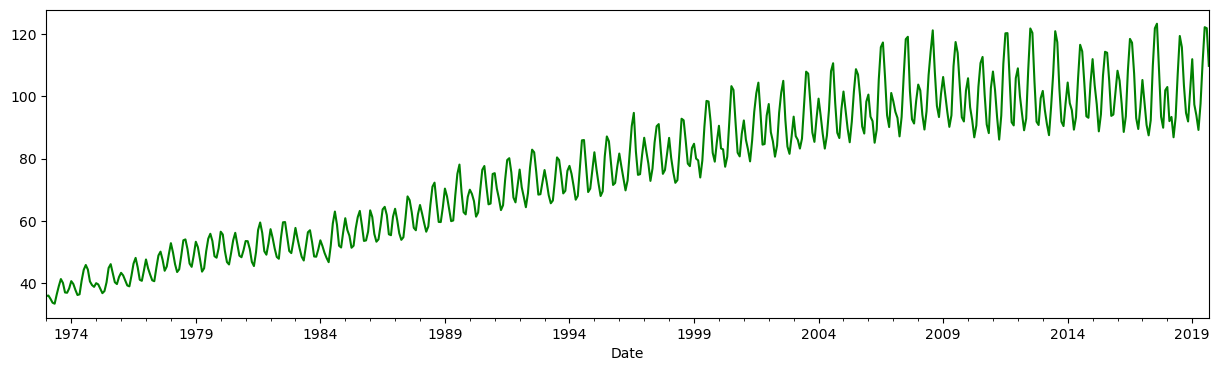

In [9]:
### checking the pattern of Electricity consumption in different years
data["Elec_cons"].plot(figsize=(15,4),c="g")

In [10]:
## Extracting Month and Year from Date Column
data["month"]=data["Date"].dt.month
data["Year"]=data["Date"].dt.year


In [11]:
data.head(5)

,Date,Elec_cons,month,Year
Date,,,,
1973-01-01,1973-01-01,35.9728,1,1973
1973-02-01,1973-02-01,36.1334,2,1973
1973-03-01,1973-03-01,35.0625,3,1973
1973-04-01,1973-04-01,33.8416,4,1973
1973-05-01,1973-05-01,33.5107,5,1973


# checking missings

In [12]:
pd.pivot_table(data=data,index="Year",columns="month",values="Elec_cons")
##one may see in month of 7 and 8 max consumption is there
## no missing value

month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1973,35.9728,36.1334,35.0625,33.8416,33.5107,36.4823,39.1412,41.4137,40.1639,37.1133,37.0248,38.4341
1974,40.7455,39.8340,37.9408,36.3004,36.5293,40.8899,44.3563,45.9240,44.4555,40.6417,39.4901,38.9068
1975,40.0956,39.6944,38.3040,36.8939,37.5668,40.3832,44.9671,46.1853,43.3001,40.3836,39.8092,42.0597
1976,43.4099,42.5826,40.9244,39.3533,39.0766,42.4851,46.3693,48.1945,45.1688,41.1880,40.8431,44.1468
1977,47.6892,44.8505,42.8557,41.0177,40.7201,45.0610,48.9685,50.1898,47.5982,44.0684,45.4267,49.3447
1978,52.9153,49.9488,46.1749,43.6652,44.5402,48.9480,53.8292,54.1182,50.9980,46.3711,45.3267,49.0027
1979,53.3617,51.6279,47.8264,43.7935,44.8591,50.3292,54.3579,55.9197,53.5776,48.7261,48.2585,51.3008
1980,56.5838,55.6802,50.4428,46.8693,46.0886,49.7595,53.8273,56.2272,52.5737,48.8947,48.4081,50.6659
1981,53.5867,53.5461,51.0708,46.9172,45.5795,50.0235,57.1384,59.5376,56.1935,50.3249,49.2234,52.8176


<AxesSubplot: xlabel='month'>

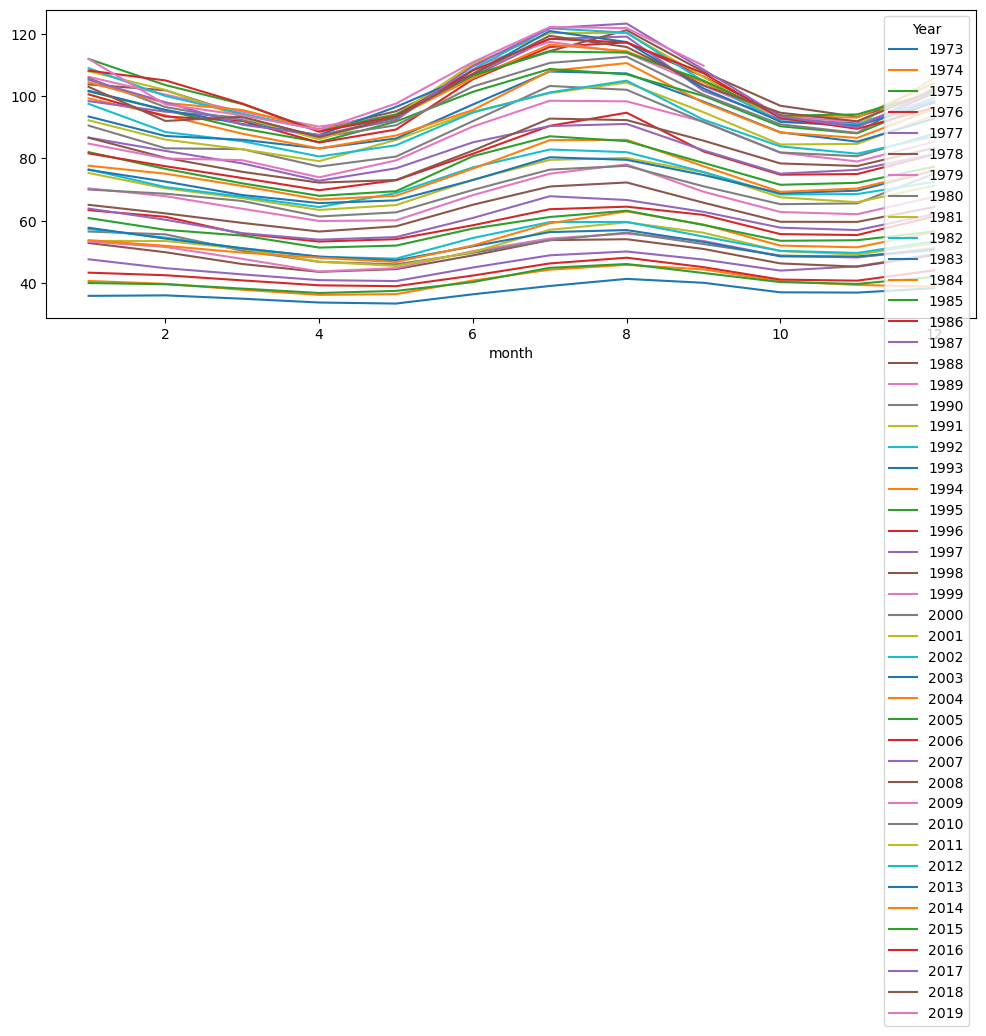

In [13]:
pd.pivot_table(data=data,index="Year",columns="month",values="Elec_cons").T.plot(figsize=(12,4))
##one may see in month of 7 and 8 max consumption is there

<AxesSubplot: >

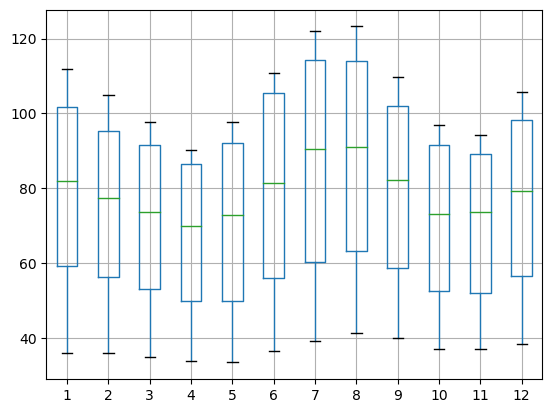

In [14]:
pd.pivot_table(data=data,index="Year",columns="month",values="Elec_cons").boxplot()
##we can see more variation  in 7 and 8 month and less in 4th month

# Decomposition 

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
decompose=seasonal_decompose(data["Elec_cons"],model="multiplicative",two_sided=False ,extrapolate_trend=4)

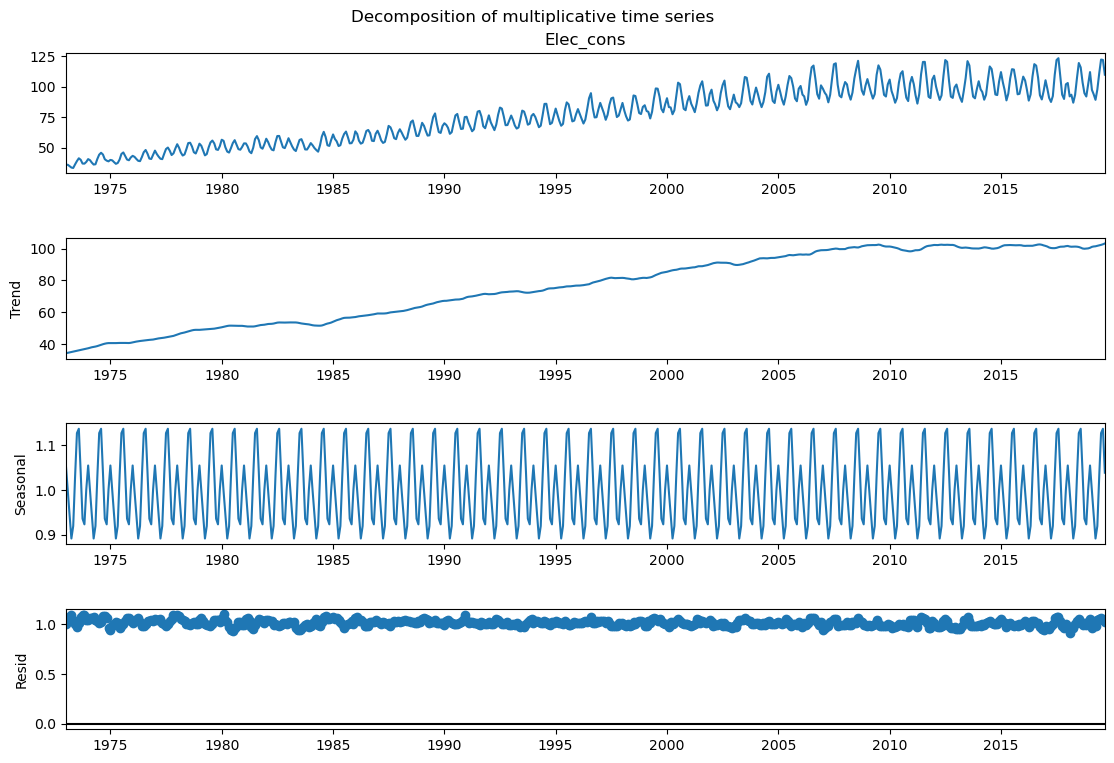

In [17]:
fig = decompose.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [18]:
decompose_data = pd.concat([decompose.trend, decompose.seasonal, decompose.resid, decompose.observed],axis=1)
decompose_data.columns = ['Trend', 'SI', "Irregular", "Actual"]

In [19]:
decompose_data

,Trend,SI,Irregular,Actual
Date,,,,
1973-01-01,34.092018,1.054397,1.000731,35.9728
1973-02-01,34.357224,0.996618,1.055266,36.1334
1973-03-01,34.622430,0.946374,1.070096,35.0625
1973-04-01,34.887636,0.891631,1.087913,33.8416
1973-05-01,35.152842,0.919530,1.036710,33.5107
...,...,...,...,...
2019-05-01,101.805712,0.919530,1.042437,97.5860
2019-06-01,102.143504,1.030825,1.052862,110.8580
2019-07-01,102.417300,1.126577,1.058246,122.1014


# Moving Average

In [20]:
ts=data["Elec_cons"]

In [21]:
#### Moving Average of 3
ts.rolling(window = 3).mean()

Date
1973-01-01           NaN
1973-02-01           NaN
1973-03-01     35.722900
1973-04-01     35.012500
1973-05-01     34.138267
                 ...    
2019-05-01     93.537967
2019-06-01     99.210433
2019-07-01    110.181800
2019-08-01    118.245300
2019-09-01    117.865633
Name: Elec_cons, Length: 561, dtype: float64

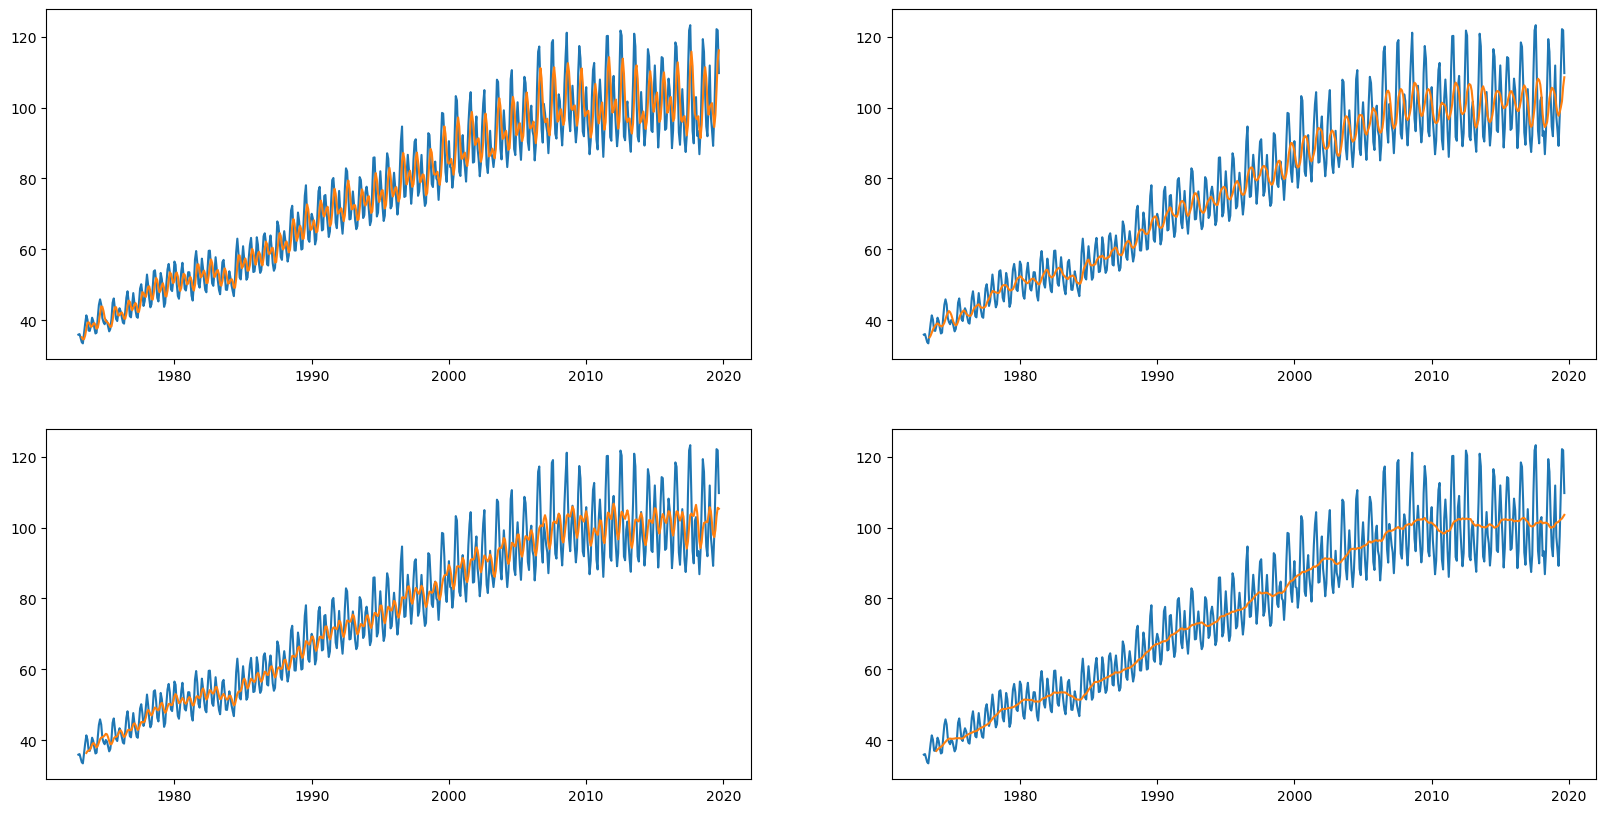

In [22]:
#### Moving Average of 4,6,8,12 Months
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(20)
fig.set_figheight(10)
axes[0][0].plot(ts.index, ts, label='Original')
axes[0][0].plot(ts.index, ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][1].plot(ts.index, ts, label='Original')
axes[0][1].plot(ts.index, ts.rolling(window=6).mean(), label='4-Months Rolling Mean')
axes[1][0].plot(ts.index, ts, label='Original')
axes[1][0].plot(ts.index, ts.rolling(window=8).mean(), label='4-Months Rolling Mean')
axes[1][1].plot(ts.index, ts, label='Original')
axes[1][1].plot(ts.index, ts.rolling(window=12).mean(), label='4-Months Rolling Mean')
plt.show()

# ETS MODEL

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

In [24]:
#### Getting the best value of Alpha ,Beta and Gamma
alpha =[0.1,0.2,0.3,0.4,0.5,0.6]
beta = [0.1,0.2,0.3,0.4,0.5,0.6]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6]

In [25]:
best_params=[]
actual=ts['2019-05-01':]
#print(actual)

for a in alpha:
        for b in beta:
            for g in gamma:
                model = ExponentialSmoothing(ts,trend='mul', seasonal='mul', seasonal_periods=12)
                model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                #print(actual.index[0])
                f_cast = model.predict(model.params, start=actual.index[0])
               #print(f_cast)
                score=np.where(np.float64(mean_absolute_error(actual, f_cast)/actual).mean()>0,np.float64(mean_absolute_error(actual,f_cast)/actual).mean(),0)
              
                best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})
df=pd.DataFrame(best_params)               

/Users/reetarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/94/yhxw3yzx6bn0kprcf_00sq800000gn/T/ipykernel_8742/3092995021.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
/Users/reetarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/Users/reetarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/94/yhxw3yzx6bn0kprcf_00sq800000gn/T/ipykernel_8742/3092995021.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, u

In [26]:
### Checking with the value of alpha beta and gamma which give least MAE
df.sort_values(by="mae",ascending=True)

,alpha,beta,gamma,mae
54,0.2,0.4,0.1,0.004868281149979338
60,0.2,0.5,0.1,0.005403495891205464
25,0.1,0.5,0.2,0.00614182730367487
49,0.2,0.3,0.2,0.0064110025364116936
20,0.1,0.4,0.3,0.007105817554092742
...,...,...,...,...
178,0.5,0.6,0.5,6213243.239638423
213,0.6,0.6,0.4,48077562069.77499
167,0.5,0.4,0.6,1.1099075368448526e+19
215,0.6,0.6,0.6,3.0270260930318627e+29


In [27]:
##Putting value of Alpha =0.2,Beta =0.4 and gamma as 0.1 on whole data
ets_model = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.2, smoothing_slope=0.4, smoothing_seasonal=0.1)



/Users/reetarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/94/yhxw3yzx6bn0kprcf_00sq800000gn/T/ipykernel_8742/3291287548.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_model = ExponentialSmoothing(ts, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.2, smoothing_slope=0.4, smoothing_seasonal=0.1)
/Users/reetarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [28]:
print(ets_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                Elec_cons   No. Observations:                  561
Model:             ExponentialSmoothing   SSE                           3214.463
Optimized:                         True   AIC                           1011.335
Trend:                   Multiplicative   BIC                           1080.610
Seasonal:                Multiplicative   AICC                          1012.597
Seasonal Periods:                    12   Date:                 Sun, 05 Feb 2023
Box-Cox:                          False   Time:                         20:47:33
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.2000000                alpha                False
smoothing_trend          

In [29]:
#### Applying ETS Model on whole data
ets_model.fittedvalues

Date
1973-01-01     37.381289
1973-02-01     35.783235
1973-03-01     34.215317
1973-04-01     32.694672
1973-05-01     33.581925
                 ...    
2019-05-01     96.446590
2019-06-01    110.935920
2019-07-01    121.803115
2019-08-01    121.304293
2019-09-01    108.989164
Length: 561, dtype: float64

In [30]:
#### Dividing tha data into Train and Test 
train = ts[:"2019-01-01"]
test=ts["2019-02-01":]
print(train.shape)
print(test.shape)

(553,)
(8,)


In [31]:
##Putting value of Alpha =0.2,Beta =0.4 and gamma as 0.1on Trained data
ets_model_train = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.2, smoothing_slope=0.4, smoothing_seasonal=0.1)

/Users/reetarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/var/folders/94/yhxw3yzx6bn0kprcf_00sq800000gn/T/ipykernel_8742/724676514.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_model_train = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.2, smoothing_slope=0.4, smoothing_seasonal=0.1)
/Users/reetarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [32]:
### forcasting for next 8 months by using ETS model used on Trained data OR forward testing
ets_fcts=ets_model_train.forecast(steps=8)
ets_fcts

2019-02-01    101.696959
2019-03-01     98.211901
2019-04-01     93.361530
2019-05-01    100.048110
2019-06-01    115.590320
2019-07-01    127.804208
2019-08-01    128.068308
2019-09-01    115.708964
Freq: MS, dtype: float64

In [33]:
### Checking the Error in case of Forward Testing 
print("MAPE_new_data:",np.mean(np.abs(test-ets_fcts)/test))

MAPE_new_data: 0.044897363036454745


In [34]:
ts["2018-01":]

Date
2018-01-01    102.9398
2018-02-01     92.0095
2018-03-01     93.3526
2018-04-01     86.8386
2018-05-01     93.2361
2018-06-01    107.1009
2018-07-01    119.2874
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Elec_cons, dtype: float64

In [35]:
#### Backward testing and checking Error
pred = ets_model.fittedvalues["2018-01":]

In [36]:
actual=ts["2018-01":]

In [37]:
print("MAPE_existing_data:", np.mean(np.abs(actual - pred)/actual))

MAPE_existing_data: 0.026290291177570174


# checking series is Stationary or not

In [38]:
from statsmodels.tsa.stattools import adfuller

In [39]:
adfuller(ts) ## is not stationary as p > 0.05

(-1.7405933729832492,
 0.4103281604468654,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [40]:
#### Making the Series as Stationary by taking log and difference
ts_ln=np.log(ts)

In [41]:
adfuller(ts_ln)## series is stationary as p<0.05

(-3.0018666788915644,
 0.0347204433006561,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.6635118596973)

In [42]:
adfuller(np.log(ts).diff(1).dropna())

(-6.884809722917939,
 1.403418175130479e-09,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2505.200358302891)

In [43]:
ts_ln_diff_1=ts_ln.diff(1).dropna()

<AxesSubplot: xlabel='Date'>

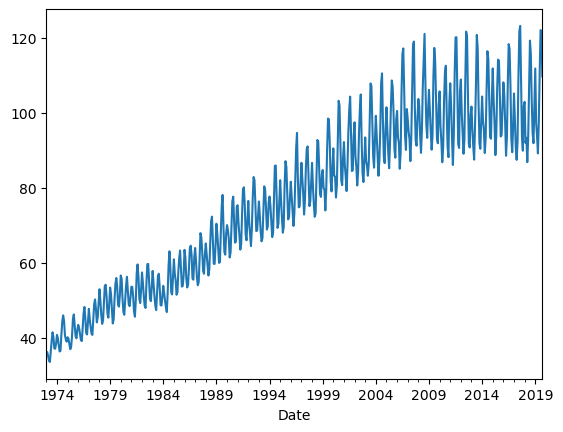

In [44]:
ts.plot()

<AxesSubplot: xlabel='Date'>

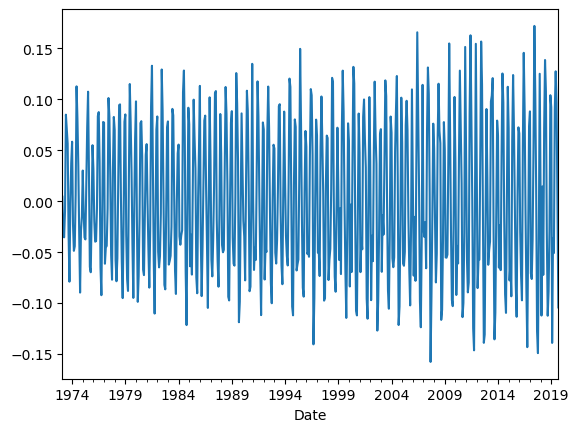

In [45]:
ts_ln_diff_1.plot() #### one can see now Series is Stationary

# Checking the Autocorrelation:-ie correlation among present and previous data ie lags

In [46]:
from statsmodels.tsa.stattools import acf,pacf_ols
import statsmodels.tsa.api as smt

In [47]:
ts=data["Elec_cons"]

In [48]:
acf(ts_ln_diff_1)

array([ 1.        ,  0.43053053, -0.39609927, -0.78691752, -0.43709318,
        0.34192253,  0.71444569,  0.33128386, -0.44054453, -0.77839262,
       -0.36117073,  0.441508  ,  0.91404146,  0.42463079, -0.38428093,
       -0.7797033 , -0.41460017,  0.34443401,  0.6996982 ,  0.32257234,
       -0.43031233, -0.76458607, -0.35466971,  0.44426704,  0.8804165 ,
        0.40843343, -0.37466443, -0.76237025])

In [49]:
pacf_ols(ts_ln_diff_1)

array([ 1.        ,  0.43209878, -0.71818668, -0.47266527, -0.20742715,
        0.21408648,  0.03963732, -0.19888647, -0.47901389, -0.42842359,
       -0.46258044, -0.25515669,  0.4860248 ,  0.09032493,  0.14313699,
       -0.0664524 ,  0.02718673, -0.00459603,  0.02994859,  0.02915946,
       -0.00732637, -0.05128737, -0.22205343, -0.10878291,  0.15561778,
        0.0330968 ,  0.10022225,  0.05958639])

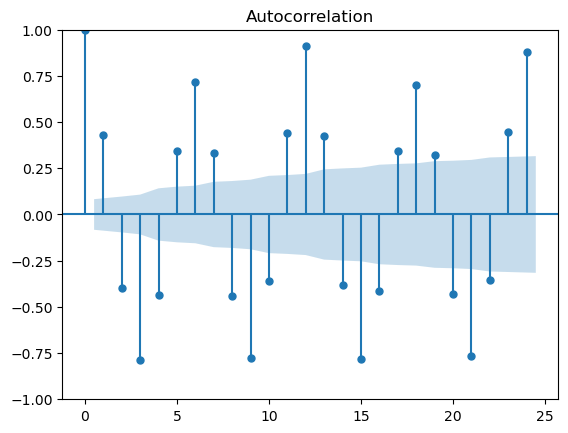

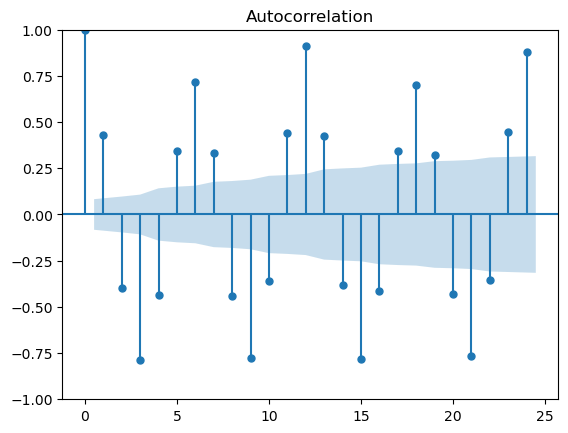

In [50]:
smt.graphics.plot_acf(ts_ln_diff_1,lags=24)
##there is no white noise/random walk,here seasonality exist therefore we will use SARIMA model

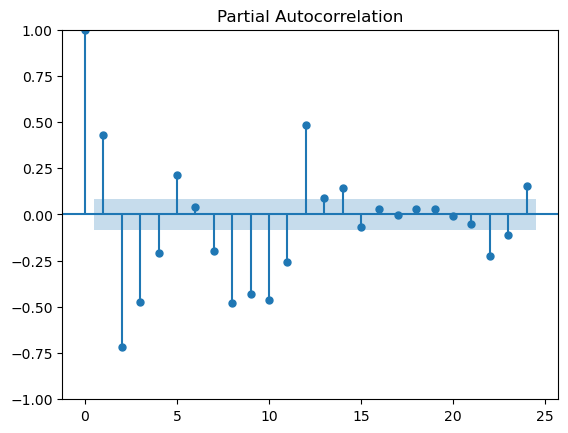

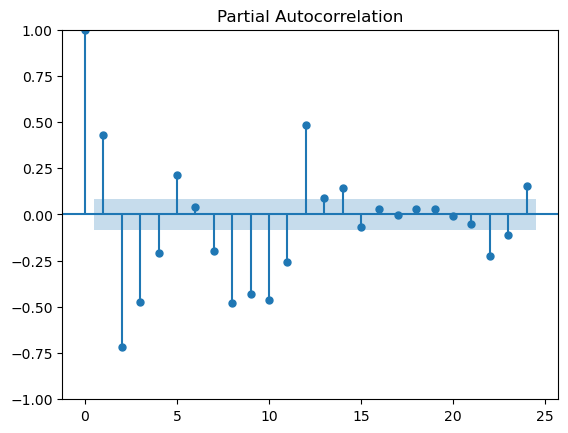

In [51]:
smt.graphics.plot_pacf(ts_ln_diff_1,lags=24,method="ols")

# Appling the SARIMA model

In [52]:
##from acf test and pacf test and adfuller values of 
p=1
q=1
d=1
P=1
Q=1
D=0
T=12

In [53]:
#### taking the log of train data
ln_train=np.log(train)

In [54]:
import statsmodels.api as sm

In [55]:
#### Applyig SARIMA model on Train data with values of (p,q,d)(P,D,Q) got from acf and pacf 
Sar_model1=sm.tsa.statespace.SARIMAX(ln_train,order=(1,1,1),
                                     seasonal_order=(1,0,1,12),enforce_stationarity=False,
                                    enforce_invertibility=False).fit()

/Users/reetarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/reetarora/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65907D+00    |proj g|=  1.23962D+01

At iterate    5    f= -2.26867D+00    |proj g|=  2.34217D+01

At iterate   10    f= -2.34685D+00    |proj g|=  1.49143D-01

At iterate   15    f= -2.34850D+00    |proj g|=  1.39761D-01

At iterate   20    f= -2.34957D+00    |proj g|=  1.46620D+00

At iterate   25    f= -2.35983D+00    |proj g|=  3.13352D+00

At iterate   30    f= -2.38605D+00    |proj g|=  2.61042D-01

At iterate   35    f= -2.38627D+00    |proj g|=  4.61391D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [56]:
print(Sar_model1.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Elec_cons   No. Observations:                  553
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                1319.609
Date:                            Sun, 05 Feb 2023   AIC                          -2629.219
Time:                                    20:47:35   BIC                          -2607.779
Sample:                                01-01-1973   HQIC                         -2620.833
                                     - 01-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6234      0.055     11.386      0.000       0.516       0.731
ma.L1         -0.8935      0.034   

In [57]:
##frwrd testing for next 8 months / Forward Testing 
fcst1=np.exp(Sar_model1.forecast(steps=8))
fcst1

2019-02-01    102.389726
2019-03-01     96.798483
2019-04-01     89.836639
2019-05-01     95.257578
2019-06-01    109.886503
2019-07-01    121.229069
2019-08-01    120.236947
2019-09-01    107.206730
Freq: MS, Name: predicted_mean, dtype: float64

In [58]:
actual=test
actual

Date
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Elec_cons, dtype: float64

In [59]:
### Checking the Error in case of Forward Testing 
print("MAPE of Sar_model1_new_data:" ,np.mean(np.abs(actual-fcst1)/actual))

MAPE of Sar_model1_new_data: 0.02076700496769412


In [60]:
#### Backward testing and checking Error
### use of np.exp for antilog
pred = np.exp(Sar_model1.fittedvalues["2018-01":])

In [61]:
actual=ts["2018-01":]

In [62]:
print("MAPE of Sar_model1_existing data", np.mean(np.abs(actual - pred)/actual))

MAPE of Sar_model1_existing data 0.02354178751214653


In [63]:
###checking for different values of p,d,q

In [64]:
import sys
import warnings
import itertools


In [65]:
##checking the least AIC-----Aic can help in telling about higher accuracy with minimum error
p_values=range(0, 2)
d_values=range(0, 2)
q_values=range(0, 2)

P_values=range(0, 2)
D_values=range(0, 1)
Q_values=range(0, 2)

In [66]:
import warnings 
warnings.simplefilter('ignore')
scores = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        if p==0 and q==0:
                            continue
                        try:
                            model = sm.tsa.statespace.SARIMAX(ln_train, order=(p,d,q), seasonal_order=(P,D,Q,12))
                            res = model.fit(disp=False)
                            score = [p,d,q,P,D,Q,12,res.aic]
                            
                            scores.append(score)
                            del model
                            del res
                        except:
                            pass
                        

res = pd.DataFrame(scores)

res.columns = ['p', 'd', 'q', 'P', 'D', 'Q',"12",'AIC']

In [67]:

res.sort_values("AIC",ascending=True)

,p,d,q,P,D,Q,12,AIC
23,1,1,1,1,0,1,12,-2658.368911
7,0,1,1,1,0,1,12,-2606.806023
19,1,1,0,1,0,1,12,-2603.806448
15,1,0,1,1,0,1,12,-2602.134070
11,1,0,0,1,0,1,12,-2597.618729
22,1,1,1,1,0,0,12,-2466.218205
6,0,1,1,1,0,0,12,-2404.065926
18,1,1,0,1,0,0,12,-2398.477723
14,1,0,1,1,0,0,12,-2389.856057
10,1,0,0,1,0,0,12,-2389.622768


In [68]:
### Applying SARIMA model on whole data
Final_sarima_model_WholeData = sm.tsa.statespace.SARIMAX(ts_ln, order = (1,1,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()
    


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.65417D+00    |proj g|=  1.23259D+01

At iterate    5    f= -2.26852D+00    |proj g|=  1.77502D+01

At iterate   10    f= -2.33971D+00    |proj g|=  5.38779D+00

At iterate   15    f= -2.34526D+00    |proj g|=  1.08577D+00

At iterate   20    f= -2.34808D+00    |proj g|=  4.28173D-02

At iterate   25    f= -2.34844D+00    |proj g|=  2.37179D-01

At iterate   30    f= -2.36474D+00    |proj g|=  1.46870D+00

At iterate   35    f= -2.38456D+00    |proj g|=  1.01269D+00

At iterate   40    f= -2.38569D+00    |proj g|=  1.51977D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [69]:
print(Final_sarima_model_WholeData.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Elec_cons   No. Observations:                  561
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                1338.374
Date:                            Sun, 05 Feb 2023   AIC                          -2666.748
Time:                                    20:47:44   BIC                          -2645.235
Sample:                                01-01-1973   HQIC                         -2658.338
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6129      0.054     11.338      0.000       0.507       0.719
ma.L1         -0.8906      0.034   

In [70]:
##frwrd testing for next 8 months / Forward Testing 
final_sarima_fcast= np.exp(Final_sarima_model_WholeData.forecast(steps=36))


 

In [71]:
pred = np.exp(Final_sarima_model_WholeData.fittedvalues["2019-02-01":])
pred


Date
2019-02-01    102.329866
2019-03-01     93.300348
2019-04-01     87.695009
2019-05-01     94.538866
2019-06-01    111.573364
2019-07-01    121.852397
2019-08-01    120.742538
2019-09-01    108.140157
dtype: float64

In [72]:
actual

Date
2018-01-01    102.9398
2018-02-01     92.0095
2018-03-01     93.3526
2018-04-01     86.8386
2018-05-01     93.2361
2018-06-01    107.1009
2018-07-01    119.2874
2018-08-01    115.7108
2018-09-01    103.4070
2018-10-01     94.6492
2018-11-01     91.9079
2018-12-01    101.9883
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Elec_cons, dtype: float64

In [73]:
print("MAPE last_1_year Sarima_final_model:" ,np.mean(np.abs(actual-pred)/actual))

MAPE last_1_year Sarima_final_model: 0.017062443043082024


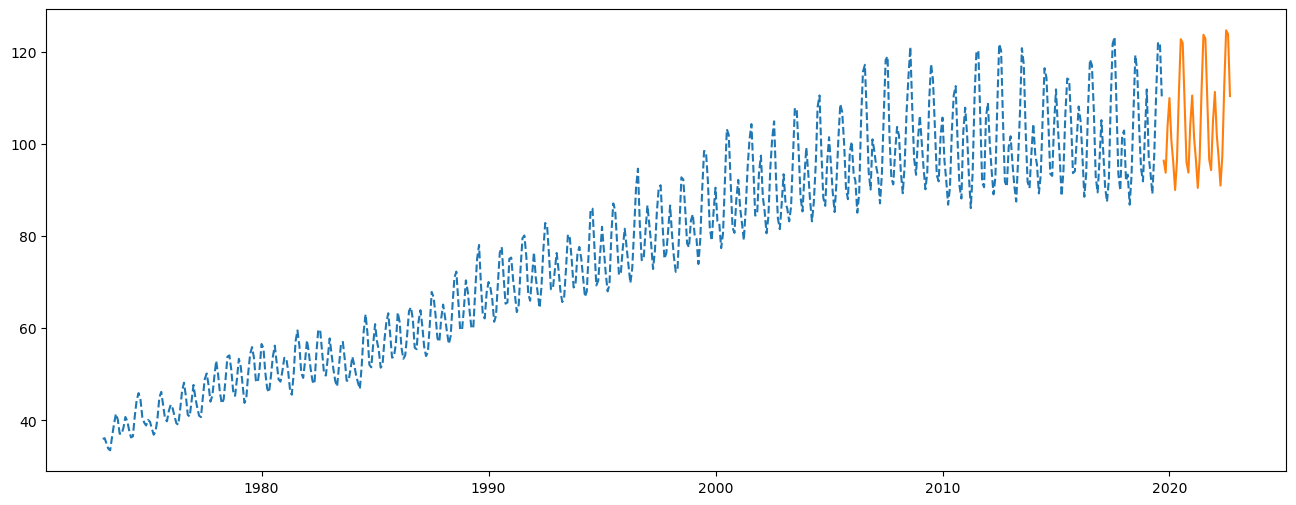

In [74]:
plt.figure(figsize=(16,6))
plt.plot(ts, '--', label='obs')
plt.plot(final_sarima_fcast, '-', label=final_sarima_fcast)
#### It shows forecasted values also shows the same pattern

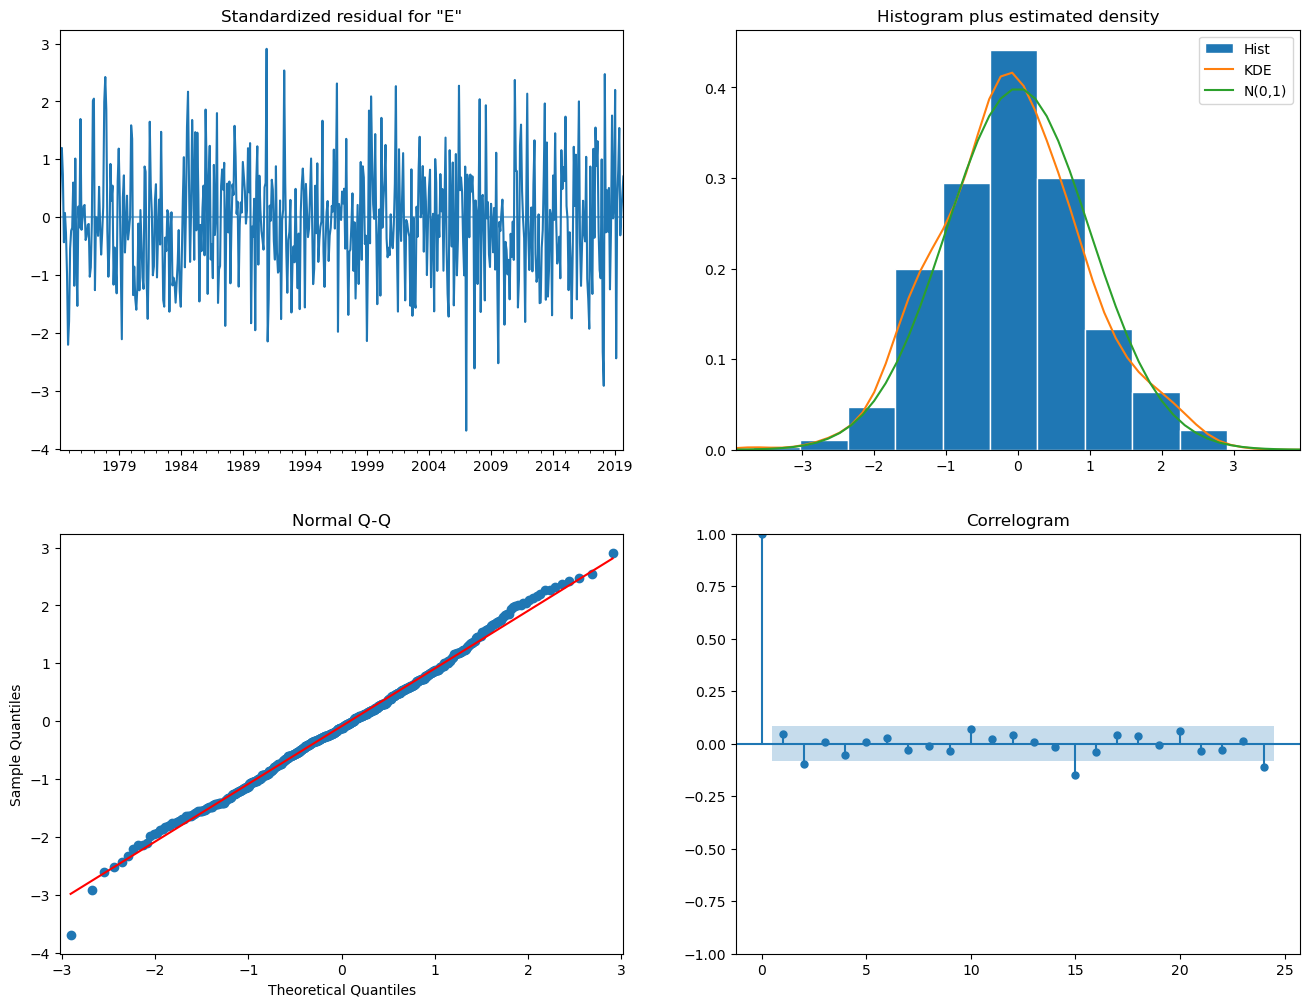

In [76]:
Final_sarima_model_WholeData.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()
## correlogram shows that there is No Autocorrelation among errors 
##Errors follow Normal Distribution 

# ANALYSATION FROM ABOVE MODELS

In [77]:
###  We have used 2 Models here 

#   1-ETS Model 
#   2-SARIMA Model
                            

ETS MODEL

In [78]:
# Error in case of Forward Testing ---> 0.044897363036454745
# Error in case of Backward Testing ---> 0.03281662426272425

SARIMA MODEL

In [79]:
# Error in case of Forward Testing --->0.02076700496769412
# Error in case of Backward Testing --->0.02354178751214653

BETTER MODEL



In [80]:
### SARIMA Model is better as it is giving least MAPE in both forward as well as backward testing